In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('Fish.CSV')

In [3]:
def show_df(df):   #function to show information about data
    
    print('shape'.center(30,'_'))
    display(df.shape)
    
    print('head'.center(30,'_'))
    display(df.head())
    
    print('tail'.center(30,'_'))
    display(df.tail())
    
    print('info'.center(30,'_')+'\n')
    display(df.info())
    
    print('describe'.center(30,'_'))
    display(df.describe().T)
  
show_df(df)

____________shape_____________


(159, 7)

_____________head_____________


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


_____________tail_____________


,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


_____________info_____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


None

___________describe___________


,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [4]:
def check(df):
    
    #function to check data have null and  duplicated values or no
    
    print('Number of null values'.center(30,'_'))
    print(df.isnull().sum())
    print(50*'_')
    print('\n'+'Number of duplicated values'.center(30,'_')+'\n')
    print(f'--------{df.duplicated().sum()}')
check(df)

____Number of null values_____
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
__________________________________________________

_Number of duplicated values__

--------0


In [5]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

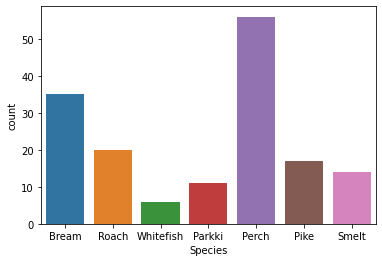

In [6]:
sns.countplot(x = df["Species"])

<AxesSubplot:>

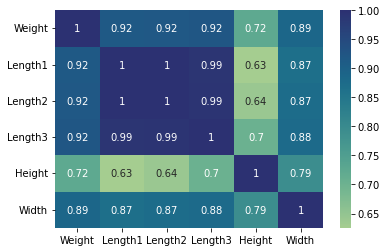

In [7]:
sns.heatmap(df.corr(), annot=True , cmap="crest")

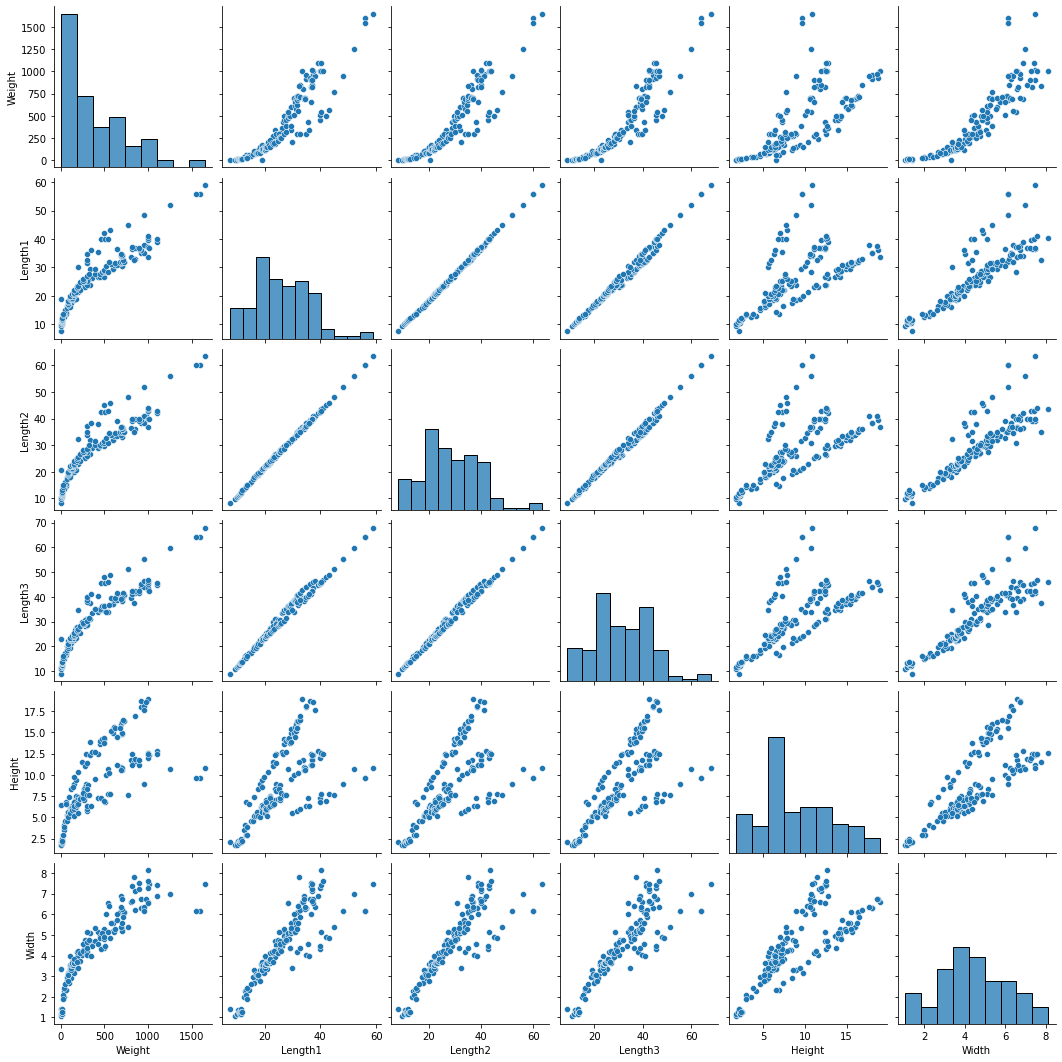

In [8]:
sns.pairplot(df)

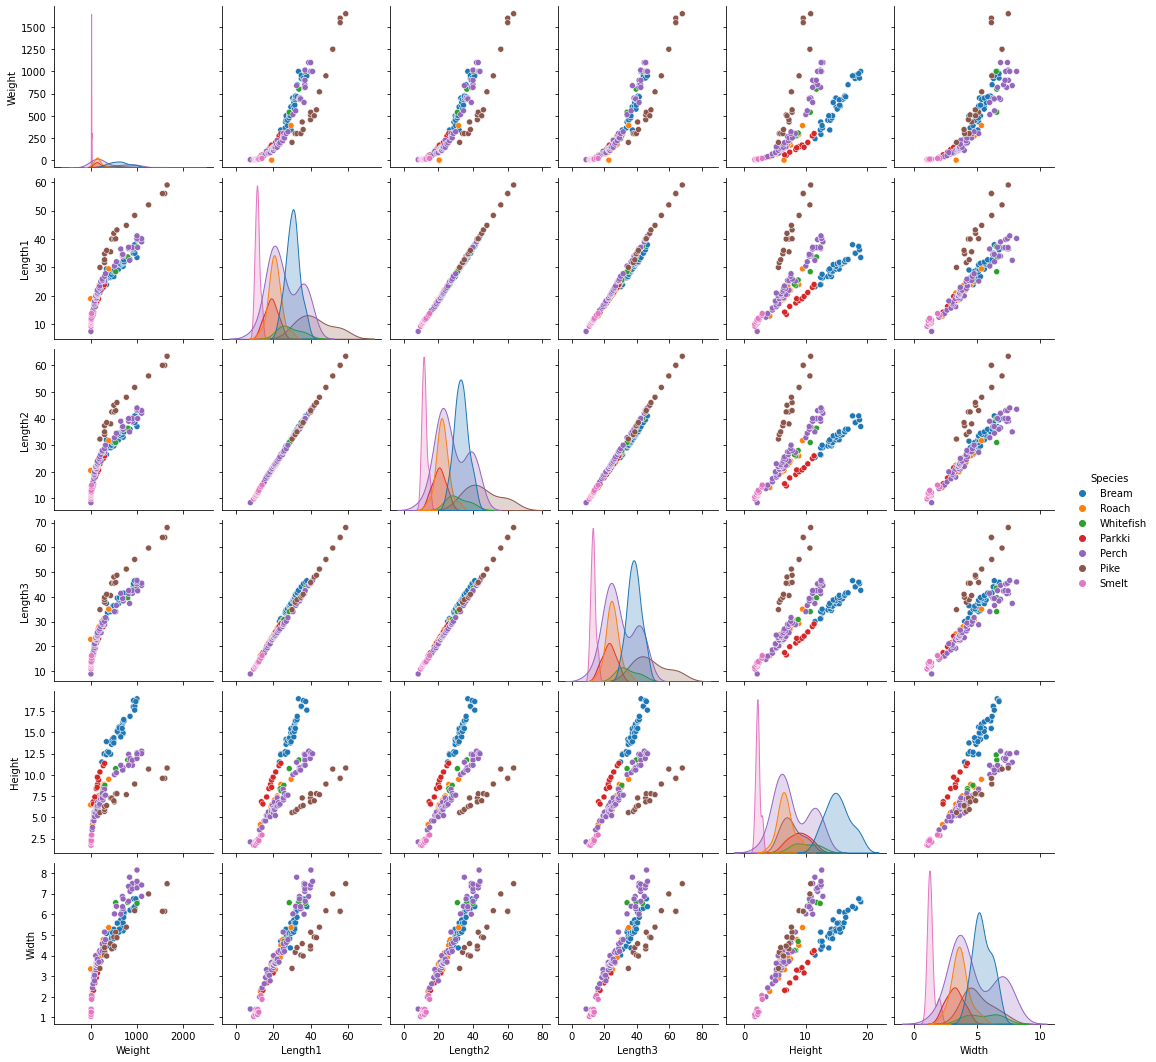

In [9]:
sns.pairplot(df, hue="Species")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [11]:
x = df[['Length1','Length2','Length3','Height','Width']]
y = df['Weight']

In [12]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.25)

In [13]:
LR = LinearRegression()

In [14]:
LR.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = LR.predict(x_test)
y_pred

array([ 161.10381066,  500.73977822,  738.03114081,  760.05674496,
        326.21246792,  820.64962073, -128.15023097,  113.6810106 ,
         71.84910196,  672.7568926 ,  937.15545139,  354.89000738,
        264.78160533, -146.34846765,  747.19666788,  853.45451387,
       -131.61968132,  -72.3972645 ,  670.80475174,  272.88099376,
        485.2893754 ,  253.18432619,  247.85214716,  328.31386506,
        647.25499194,  547.76112497,  136.67177741,  476.80989491,
        149.59298712,  -91.90686062,  116.87411829,  291.41854023,
        295.0985683 ,  367.70325173,  779.82823438,  554.41540433,
        152.88313031,  665.29373822,  472.01019869,  360.59680712,
       1115.07886563,  105.82428238,   39.63175275, 1231.49389237,
       -172.15371335,  337.21879841,  373.71431725,  683.53989476,
        379.11293905,  332.87825923,  751.80148595,  420.05959528,
        216.16422244,  174.08818007, -170.06200226,  406.19839422,
        787.84358833,  526.42385131,  -77.69512263,   39.92920

In [16]:
score = LR.score(x_test, y_test)
score

0.8819060575637248